# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
### <center><font color=navy>Feature Extraction & Dimensionality Reduction with Deep Autoencoders</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

   
<center><img src="images/autoencoder.png" width="450" alt="A simple Autoencoder."></center>


- Habibnia, Ali (2016) Essays in high-dimensional nonlinear time series analysis. PhD thesis, London School of Economics and Political Science **Chapter.3** (Nonlinear Forecasting Using a Large Number of Predictors) https://etheses.lse.ac.uk/3485/

- Habibnia, Ali (2015) Nonlinear forecasting with many predictors by neural network factor models. In: LSE Research Festival 2015, 2015-05-21, London, United Kingdom. https://eprints.lse.ac.uk/62916/

The challenge of modeling data with numerous features is significant, as models often perform poorly when cluttered with irrelevant information. Identifying the most significant features is a non-trivial task, making dimensionality reduction techniques invaluable. While linear methods like Principal Component Analysis (PCA) utilize matrix factorization techniques such as eigendecomposition and Singular-Value Decomposition (SVD) for this purpose, autoencoders provide a powerful nonlinear alternative. They not only simplify the data but also uncover complex, hidden structures, offering a deeper insight into the essence of the data.
    
Autoencoders stand out in the landscape of artificial neural networks with their unique capability to learn efficient data representations, primarily for dimensionality reduction and feature learning, through unsupervised learning. This means they do not rely on labeled datasets to specify outputs for inputs. Instead, they ingeniously encode input data into a condensed form that can be decoded back to its original state, albeit with some loss of information.
    
Throughout this lecture, we will delve deeper into the mechanics of autoencoders, exploring their architecture, how they learn from data, and their applications. 
    


### Autoencoders

Autoencoders are versatile tools in data science and machine learning with applications ranging from uncovering hidden data structures and compressing data for efficient storage, to clustering and retrieving similar items. They excel in transforming complex, high-dimensional data into more manageable forms, aiding in data analysis and visualization. Moreover, autoencoders, especially advanced versions like Variational Autoencoders (VAEs), are capable of generating new data samples, broadening their utility in fields like generative modeling and synthetic data generation

“Autoencoding” is a data compression algorithm where the compression and decompression functions are 1) data-specific, 2) lossy, and 3) learned automatically from examples rather than engineered by a human. Additionally, in almost all contexts where the term “autoencoder” is used, the compression and decompression functions are implemented with neural networks.

For building an autoencoder, three things are needed: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a “loss” function).

The simplest form of an autoencoder is a feedforward neural network where the input $x$ is fed to the hidden layer and the output of hidden layer is then fed to reconstruct the original inputs. A simple autoencoder is shown below:

<center><img src="images/autoencoder2.png" width="750" alt="A simple Autoencoder."></center>


Autoencoders map the data they are fed to a lower dimensional space by combining the data’s most important features. It encodes the original data into a more compact representation. It also decides how the data is combined, hence the auto in Autoencoder. We refer to these encoded features as latent variables.

There are a few reasons doing this may be useful:

1. Dimensionality reduction can decrease training time.
1. Using latent feature representations may enhance model performance.


Like the Autoencoder model, Principal Components Analysis (PCA) is also widely used as a dimensionality reduction technique. However, PCA maps the input in a different way than an Autoencoder.

Both PCA and Autoencoder can be thought of as a lossy data compression algorithm. The quality of the data is not perfectly retained -- some of the original data get lost. Notice that it is different with feature selection. Feature selection algorithms discard some features of the data and retain salient features. The features they retain are typically chosen for statistical reasons, such as the correlation between the attribute and the target label. Autoencoder, as a feature extraction algorithm, projects data into a new space.

Let's recap how PCA worked first.

### PCA


PCA is one of the most popular **model-free** and **linear** dimensionality reduction techniques that first introduced by Karl Pearson (Pearson,1901). PCA aims to detect the correlation between variables. Convert possible correlated features (predictors) into linearly uncorrelated features (predictors) called principal components. PCA is a method for extracting  latent variables that explain common variance across features.

PCA can be conceptualized through two complementary perspectives: variance maximization and error minimization.

https://www.stat.cmu.edu/~cshalizi/350/lectures/10/lecture-10.pdf

#### Variance Maximization

From the variance maximization perspective, PCA aims to find the directions (principal components) in the data space that maximize the variance of the projected data. The first principal component is the direction that accounts for the largest possible variance in the data set. Each subsequent component, orthogonal to the previous ones, captures the maximum remaining variance. This approach ensures that the reduced-dimensional space retains as much variability from the original data as possible.

1. **First Principal Component**: Identifies the direction along which the data varies the most.
2. **Subsequent Principal Components**: Identified orthogonal to the previous components, these directions capture the next highest variances.

Mathematically, this is achieved by computing the eigenvectors of the covariance matrix of the data, where each eigenvector represents a principal component direction, and the corresponding eigenvalue indicates the amount of variance captured by that eigenvector.

#### Error Minimization

From the error minimization perspective, PCA seeks to minimize the reconstruction error, which is the difference between the original data and its projection onto a lower-dimensional space. This perspective involves finding a linear subspace such that when the data is projected onto this subspace and then reconstructed back, the total squared reconstruction error is minimized.

1. **Reconstruction Error**: The squared differences between the original data points and their projections onto the principal components.

The loss function $L$ in autoencoders is typically defined as the reconstruction error between the input $X$ and its reconstruction $\hat{X}$ from the autoencoder. A common choice for this error term is the Mean Squared Error (MSE), which can be augmented with a matrix norm to enforce regularization. The loss function can be expressed as:

$ L(X, \hat{X}) = \frac{1}{n} \sum_{i=1}^{n} \|X_i - \hat{X}_i\|^2_2 + \lambda \|W\|_F^2 $

where:

- $\|X_i - \hat{X}_i\|^2_2$ is the squared Euclidean (L2) norm representing the reconstruction error for the $i$-th sample.
- $n$ is the total number of samples.
- $\lambda$ is the regularization parameter.
- $\|W\|_F^2$ is the Frobenius norm of the weight matrix $W$, used as a regularization term to prevent overfitting by penalizing large weights.




2. **Minimizing Error**: By selecting the principal components that minimize this error, PCA ensures that the loss of information (due to dimensionality reduction) is as small as possible.

This approach can be formulated as an optimization problem, where the objective is to find the subspace that minimizes the sum of squared distances between the original data points and their projections.

These two perspectives, variance maximization and error minimization, are fundamentally connected. The direction that maximizes the variance of the projected data also minimizes the reconstruction error. This connection arises because when the variance in the projected space is maximized, the distance (error) between the original data points and their projections is minimized. Thus, by solving for one, PCA inherently addresses the other, providing a powerful method for dimensionality reduction that balances the retention of important information with the reduction of irrelevant details.

<img src="images/PCA_Plot.gif"  width="550">

### Showcase

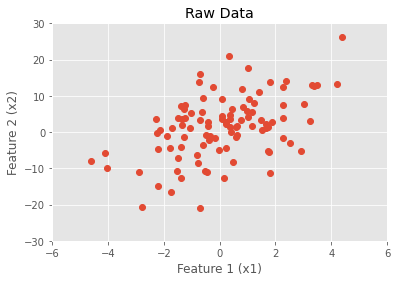

In [37]:
# we generate the data and plot it below.

import numpy as np, matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

np.random.seed(1) #make sure we're all working with the same numbers

X = np.random.normal(0.0,2.0,[100,1])
X = [X,X*2+np.random.normal(0.0,8.0,[100,1])]
X = np.squeeze(X)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Raw Data')
plt.axis([-6,6,-30,30]);

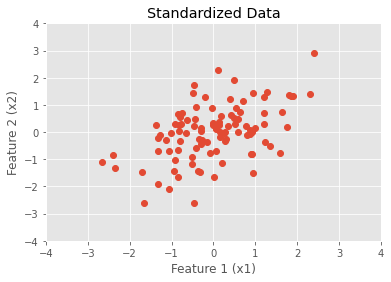

In [38]:
# Below we normalize and plot the data.

import scipy.stats as stats

X = stats.mstats.zscore(X,axis=1)

plt.plot(X[0],X[1],'o')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data')
plt.axis([-4,4,-4,4]);

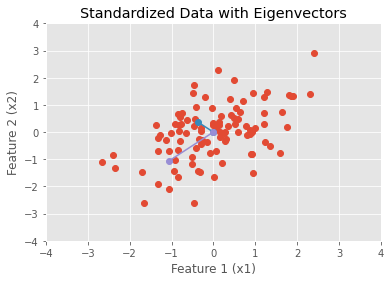

In [39]:
C = np.dot(X,np.transpose(X))/(np.shape(X)[1]-1);
[V,PC] = np.linalg.eig(C)

plt.plot(X[0],X[1],'o')
plt.plot([0,PC[0,0]*V[0]],[0,PC[1,0]*V[0]],'o-')
plt.plot([0,PC[0,1]*V[1]],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Standardized Data with Eigenvectors')
plt.axis([-4,4,-4,4]);

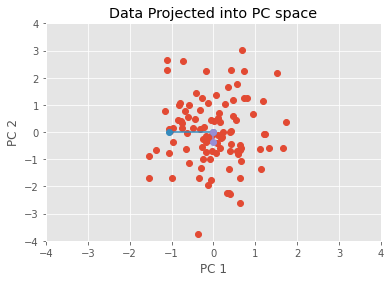

In [40]:
indices = np.argsort(-1*V)
V = V[indices]
PC = PC[indices,:]

X_rotated = np.dot(X.T,PC)

plt.plot(X_rotated.T[0],X_rotated.T[1],'o')
plt.plot([0,PC[1,0]*V[0]],[0,0],'o-')
plt.plot([0,0],[0,PC[1,1]*V[1]],'o-')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data Projected into PC space')
plt.axis([-4,4,-4,4]);

### Eigendecomposition

Matrix decompositions are methods that reduce a matrix into constituent parts that make it easier to calculate more complex matrix operations. A common analogy for matrix decomposition is the factoring of numbers, such as the factoring of 10 into 2 × 5.

Perhaps the most used type of matrix decomposition is the eigendecomposition that decomposes a (square) matrix into eigenvectors and eigenvalues. This decomposition also plays a role in methods used in machine learning, such as in the Principal Component Analysis method or PCA.

A vector is an eigenvector of a matrix if it satisfies the following equation.
<center>$ A·v=λ·v ~ or ~ Av = λv$</center>

This is called the eigenvalue equation, where $A$ is the parent square matrix that we are decomposing, $\nu$ is the eigenvector of the matrix, and $λ$ is the lowercase Greek letter lambda and represents the eigenvalue scalar.

The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

<center>$ A = Q · Λ · Q^T$</center>

Where $Q$ is a matrix comprised of the eigenvectors, $Λ$ is the uppercase Greek letter lambda and is the diagonal matrix comprised of the eigenvalues, and $Q^T$ is the transpose of the matrix comprised of the eigenvectors.

Eigenvectors are unit vectors, which means that their length or magnitude is equal to 1.0. They are often referred as right vectors, which simply means a column vector. Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.

A matrix that has only positive eigenvalues is referred to as a positive definite matrix, whereas if the eigenvalues are all negative, it is referred to as a negative definite matrix.

In [41]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
   [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
print(values)
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [42]:
# reconstruct matrix
from numpy import diag
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]])
print(A)
# factorize
values, vectors = eig(A)
# create matrix from eigenvectors
Q = vectors
# create inverse of eigenvectors matrix
R = inv(Q)
# create diagonal matrix from eigenvalues
L = diag(values)
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


###  DR with PCA

The first step is to calculate the mean values of each column. Next, we need to center the values in each column by subtracting the mean column value. The next step is to calculate the covariance matrix of the centered matrix. Finally, we calculate the eigendecomposition of the covariance matrix. The eigenvectors can be sorted by the eigenvalues in descending order to provide a ranking of the components or axes of the new subspace. Ideally, we would select $k$ eigenvectors, called principal components, that have the $k$ largest eigenvalues.

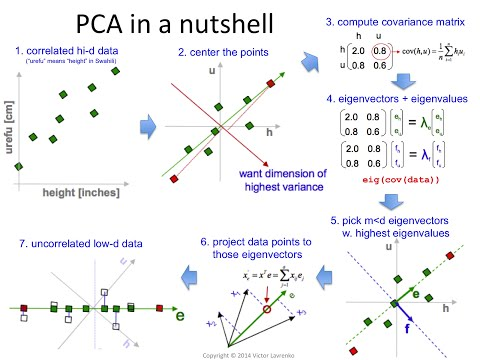

In [7]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('QP43Iy-QQWY')

In [43]:
# principal component analysis
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define matrix
A = array([
  [1, 2],
  [3, 4],
[5, 6]])
print(A)
# column means
M = mean(A.T, axis=1)
# center columns by subtracting column means 
C=A-M
# calculate covariance matrix of centered matrix 
V = cov(C.T)
# factorize covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


### Principal Component Analysis in [scikit-learn](http://scikit-learn.org)



In [44]:
# principal component analysis with scikit-learn
from numpy import array
from sklearn.decomposition import PCA
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# create the transform
pca = PCA(2)
# fit transform
pca.fit(A)
# access values and vectors
print(pca.components_)
print('exp_var', pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
exp_var [8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


### Singular Value Decomposition

Matrix decomposition, also known as matrix factorization, involves describing a given matrix using its constituent elements. Perhaps the most known and widely used matrix decomposition method is the Singular-Value Decomposition, or SVD. All matrices have an SVD, which makes it more stable than other methods, such as the eigendecomposition. As such, it is often used in a wide array of applications including compressing, denoising, and data reduction.

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

<center>$ A=U·Σ·V^T$</center>

Where $A$ is the real $n×m$ matrix that we wish to decompose, $U$ is an $m×m$ matrix, $Σ$ represented by the uppercase Greek letter sigma)is an $m×n$ diagonal matrix, and $V^T$ is the $V$ transpose of an $n × n$ matrix where $T$ is a superscript.

The diagonal values in the $Σ$ matrix are known as the singular values of the original matrix $A$. The columns of the $U$ matrix are called the left-singular vectors of $A$, and the columns of $V$ are called the right-singular vectors of $A$. The SVD is calculated via iterative numerical methods. We will not go into the details of these methods. Every rectangular matrix has a singular value decomposition, although the resulting matrices may contain complex numbers and the limitations of floating point arithmetic may cause some matrices to fail to decompose neatly.


- $U$ is the matrix of eigenvectors of $AA^T$
- $Σ$ contains the squareroot of the eigenvalues of $AA^T$
- $V$ is the matrix of eigenvectors of $AA^T$

In this representation the diagonal entries in $Σ$ are the singular values and they are normally ordered with the largest singular value (largest eigenvalue) first. Dimension reduction is achieved by dropping all but k of these singular values.

The SVD is used widely both in the calculation of other matrix operations, such as matrix inverse, but also as a data reduction method in machine learning. SVD can also be used in least squares linear regression, image compression, and denoising data.

#### Calculate Singular-Value Decomposition

The SVD can be calculated by calling the **svd()** function.

In [45]:
# singular-value decomposition
from numpy import array
from scipy.linalg import svd
# define a matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
print(U)
print(s)
print(V)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [46]:
# reconstruct rectangular matrix from svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1, 2],
  [3, 4],
  [5, 6]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(V))
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1. 2.]
 [3. 4.]
 [5. 6.]]


#### Dimensionality Reduction

A popular application of SVD is for dimensionality reduction. Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem. The result is a matrix with a lower rank that is said to approximate the original matrix. To do this we can perform an SVD operation on the original data and select the top $k$ largest singular values in $Σ$. These columns can be selected from $Σ$ and the rows selected from $V^T$ . An approximate $B$ of the original vector $A$ can then be reconstructed.

<center>$ B=U·Σ_k ·V_k^T$</center>


In [47]:
# data reduction with svd
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# factorize
U, s, V = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print(B)
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


In [48]:
# svd data reduction in scikit-learn
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define matrix
A = array([
  [1,2,3,4,5,6,7,8,9,10],
  [11,12,13,14,15,16,17,18,19,20],
  [21,22,23,24,25,26,27,28,29,30]])
print(A)
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


### PCA vs Linear Regression

<img src="images/pcavslr.jpg"  width="500">

> PCA (Perpendicular/orthogonal distance - between x_1 and x_2),
OLS (Vertical distance - between x and y)

### Showcase: PCA Image Compression

In [49]:
import scipy
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

# IMPORTING IMAGE AND TAKING R,G,B COMPONENTS

a = plt.imread("images/hokie.jpg")
a_np = np.array(a)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def comp_2d(image_2d): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA
    cov_mat = image_2d - np.mean(image_2d , axis = 1)
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
    numpc = 100 # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.mean(image_2d, axis = 1).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = comp_2d(a_r), comp_2d(a_g), comp_2d(a_b) # RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
recon_color_img = Image.fromarray(recon_color_img)
recon_color_img.show()

For more details on Principal Component Analysis Application to images see: http://people.ciirc.cvut.cz/~hlavac/TeachPresEn/11ImageProc/15PCA.pdf

## Macroeconomic Forecasting Using PCA and Deep Autoencoders


In this example, we will explore the application of Principal Component Analysis (PCA) for macroeconomic forecasting, specifically for predicting the one-step-ahead monthly GDP growth rate. We'll be using a dataset named MacroDataset.csv, which contains 144 macroeconomic variables covering the period from January 1960 to May 2009.

***Gross Domestic Product (GDP)*** is a comprehensive measure of a country's overall economic activity. It represents the total value of all goods and services produced over a specific time period within a nation's borders. GDP growth rate, on the other hand, is an important indicator that reflects the rate at which a country's economy is growing or contracting from one period to the next. It's expressed as a percentage increase or decrease in GDP and is used to assess the health of an economy, influencing policy decisions, investment strategies, and more.

Understanding GDP growth involves recognizing its components and the factors that can influence these numbers, such as changes in consumer spending, government expenditure, investments, and net exports. Positive GDP growth indicates a thriving, expanding economy, whereas negative growth may signal economic downturns.

***Rolling window forecasting*** is a technique used in time-series analysis where a model is trained and tested on different subsets of the data to predict future values. This approach involves moving the training and testing window through the dataset, where for each iteration, the model is trained on a fixed-size segment of the data (the "window"), then makes a prediction for the subsequent period. The window then rolls forward to include the next observation in the training set while dropping the oldest observation, maintaining a constant window size.


Before applying PCA, we'll first prepare the data by creating a Correlation Heatmap. This will help us understand the relationships between different macroeconomic variables and identify patterns of multicollinearity, which PCA can help address.

We'll divide the dataset into a training set for model development and a test set (the last 50 observations) for evaluating the model's forecasting performance.


You can see more details about the variables and the problem in the following papers:

https://www.princeton.edu/~mwatson/papers/Stock_Watson_JBES_2002.pdf

https://www.princeton.edu/~mwatson/papers/Stock_Watson_JASA_2002.pdf

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import visualkeras

In [7]:
# Load the dataset
df = pd.read_csv('MacroDataset.csv')
print(df.shape)
df.head()

(593, 144)


,IPS10,IPS11,IPS299,IPS12,IPS13,IPS18,IPS25,IPS32,IPS34,IPS38,...,UTL11,UTL15,UTL17,UTL21,UTL22,UTL29,UTL31,UTL32,UTL33,GDP
0,0.025916,0.024098,0.029021,0.031232,0.103830,0.004562,0.036331,0.028478,0.039057,0.015242,...,1.9934,-1.1482,2.9184,23.9500,-0.5621,0.5490,-0.5583,0.7844,2.0431,-0.003279
1,-0.008936,-0.005687,-0.003438,-0.011453,-0.013860,-0.010292,0.006468,-0.013043,-0.016701,-0.006148,...,-0.9508,0.9608,0.8108,-1.9494,0.7227,-1.4930,0.0455,-1.0293,0.9002,0.003661
2,-0.009021,-0.003425,-0.001150,0.001151,-0.019964,0.009155,0.002144,-0.016548,-0.032091,0.000439,...,-1.3687,-4.4731,-2.3569,-4.9206,-0.7161,-0.2590,0.1328,0.3987,-1.6326,0.001051
3,-0.007959,0.002286,0.001150,0.006882,-0.001190,0.010196,-0.010774,-0.023635,-0.036528,-0.008800,...,-0.9828,1.9064,-1.9919,-3.1941,-0.0736,-1.2112,0.8283,-0.8637,-1.1691,0.000276
4,-0.001140,0.005689,0.006864,0.005697,0.009456,0.003377,0.003246,-0.009154,-0.013618,0.001562,...,-0.7882,-1.9202,-0.6026,0.2041,1.6132,0.2790,-0.6641,-0.7484,-1.0438,-0.002883


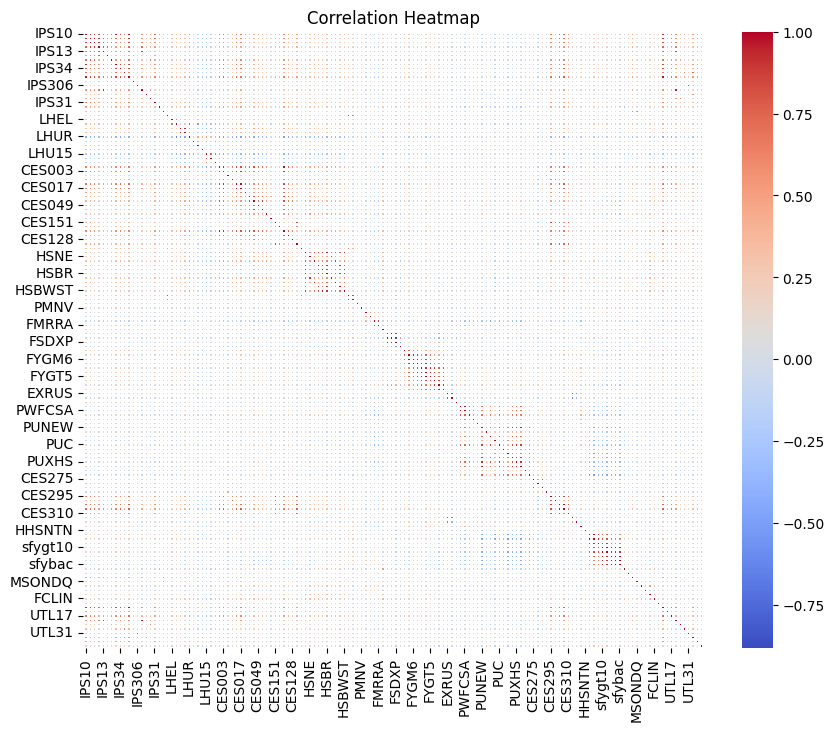

In [8]:
# Create a correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Data splitting
X = df.iloc[:, :-1]  # All columns except the last one as features
y = df.iloc[:, -1]   # The last column as the target variable (GDP growth rate)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, shuffle=False)

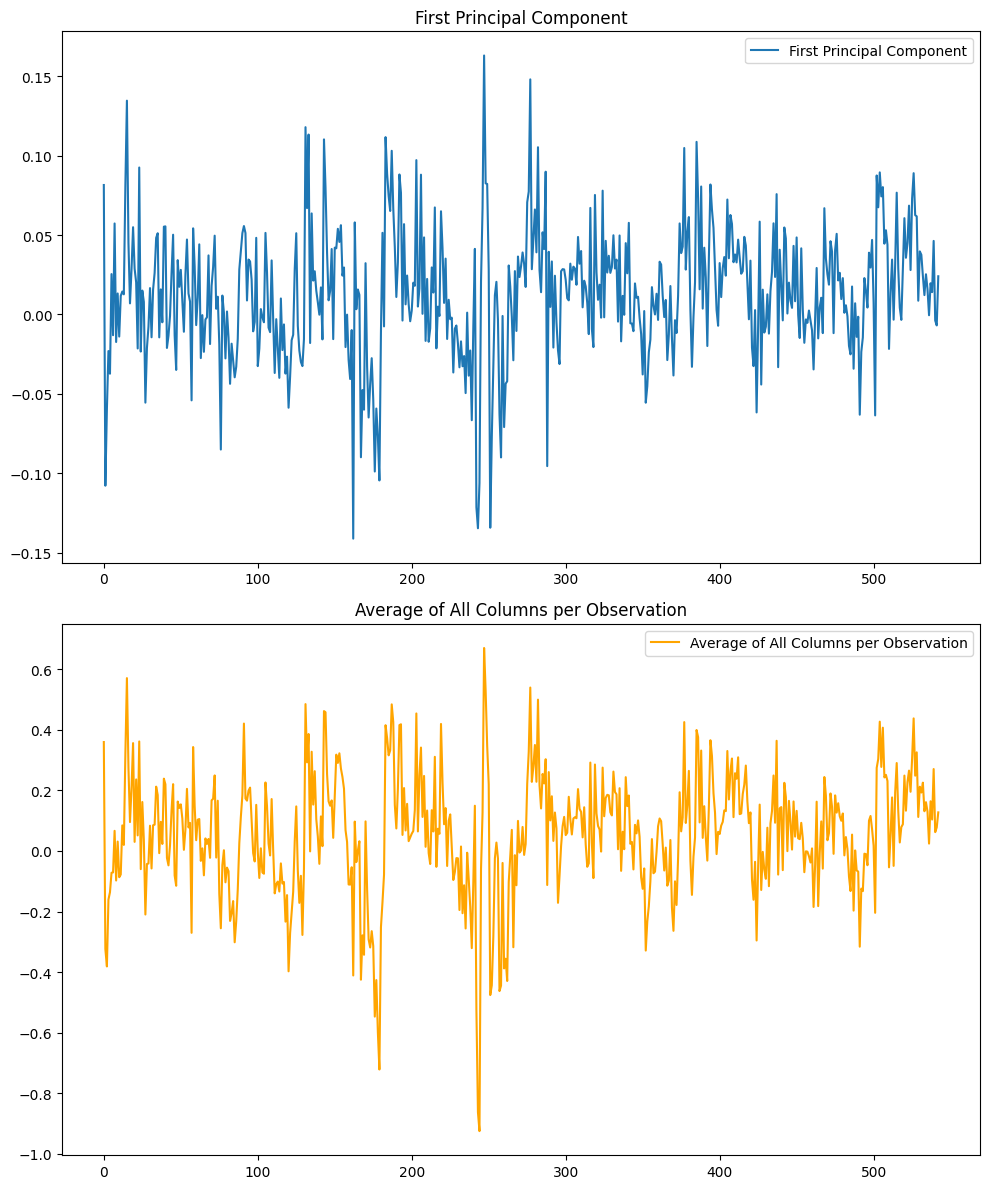

In [10]:
# Assuming pca is your PCA object and X_train is your training data
# Transpose X_train for PCA to compute components based on columns (variables)
X_train_T = X_train.T

# Perform PCA on the transposed data
pca = PCA(n_components=1)  # Assuming you want to compute only the first component
pca.fit(X_train_T)

# First Principal Component
first_component = pca.components_[0]

# Calculate the average of all columns for each observation
average_per_observation = X_train.mean(axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 12))

# First subplot for the First Principal Component
plt.subplot(2, 1, 1)  # (rows, columns, subplot number)
plt.plot(first_component, label='First Principal Component')
plt.legend()
plt.title('First Principal Component')

# Second subplot for the Average of All Columns per Observation
plt.subplot(2, 1, 2)  # (rows, columns, subplot number)
plt.plot(average_per_observation, label='Average of All Columns per Observation', color='orange')  # Directly plot the NumPy array
plt.legend()
plt.title('Average of All Columns per Observation')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

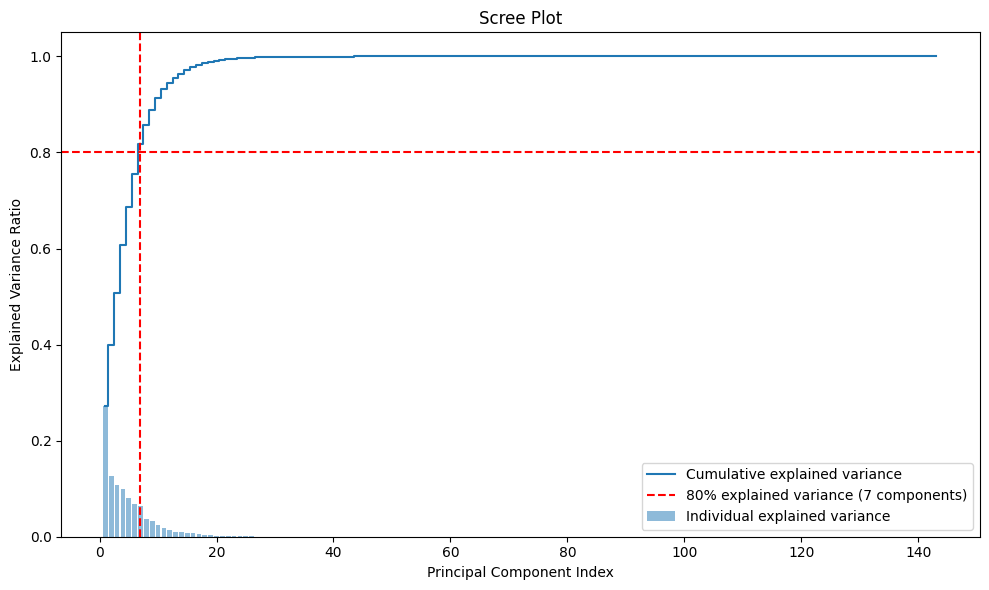

In [11]:
# Perform PCA without reducing dimensionality to compute all components
pca_full = PCA()
pca_full.fit(X_train)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components for 80% of explained variance
components_80_variance = np.argmax(cumulative_explained_variance >= 0.8) + 1  # +1 because index starts at 0

# Plotting
plt.figure(figsize=(10, 6))

# Scree plot of explained variance
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')

# Highlight the point where 80% variance is explained
plt.axvline(x=components_80_variance, linestyle='--', color='r', label='80% explained variance ({} components)'.format(components_80_variance))
plt.axhline(y=0.8, linestyle='--', color='r')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 19ms/step
RMSE PCA + LR: 0.0037
RMSE AE + LR: 0.0043
RMSE AE + NN: 0.0055


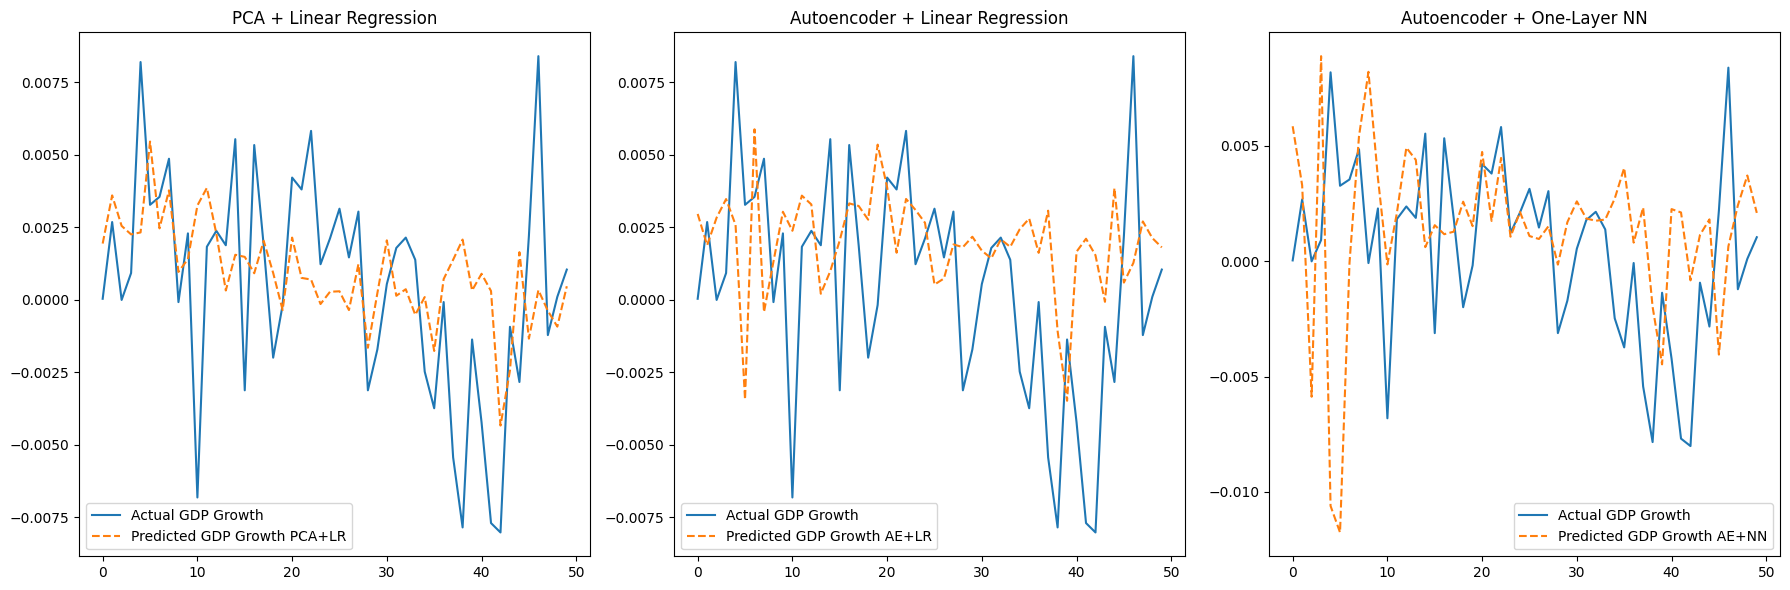

In [27]:
# Function to build and compile the autoencoder
def build_autoencoder(input_dim, optimizer, learning_rate):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    hidden_1 = Dense(128, activation='relu')(input_layer)
    hidden_2 = Dense(64, activation='relu')(hidden_1)
    hidden_3 = Dense(8, activation='relu')(hidden_2)
    encoded = Dense(n_components, activation='sigmoid')(hidden_3)  # Reduced size for encoded layer

    # Decoder
    decoder_hidden_3 = Dense(8, activation='relu')(encoded)
    decoder_hidden_2 = Dense(64, activation='relu')(decoder_hidden_3)
    decoder_hidden_1 = Dense(128, activation='relu')(decoder_hidden_2)
    decoded = Dense(input_dim, activation='sigmoid')(decoder_hidden_1)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mse')

    # Separately defining the encoder
    encoder = Model(input_layer, encoded)

    return autoencoder, encoder

# Function to build a one-layer neural network
def build_one_layer_nn(input_dim, hidden_units, activation, optimizer, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_units, activation=activation, input_shape=(input_dim,)))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer(learning_rate=learning_rate), loss='mse')
    return model


scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.concatenate((X_train, X_test), axis=0))

# Scenario 1: PCA with Linear Regression using Rolling Window Forecasting


# Determine the number of PCA components explaining 80% variance
pca = PCA().fit(X_scaled[:len(X_train)])  # Fit on training data only
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance >= 0.8)[0][0] + 1  # +1 because indices start at 0

# Initialize PCA with the determined number of components
pca = PCA(n_components=n_components)
actual_values_pca = []
predictions_pca = []

for end in range(len(X_train), len(X_scaled)):
    current_train = X_scaled[:end]
    current_test = X_scaled[end:end+1]

    X_train_pca = pca.fit_transform(current_train)
    y_train_current = y[:end]

    model_lr_pca = LinearRegression()
    model_lr_pca.fit(X_train_pca, y_train_current)

    X_test_pca = pca.transform(current_test)
    y_pred = model_lr_pca.predict(X_test_pca)

    actual_values_pca.extend(y[end:end+1])
    predictions_pca.extend(y_pred)

rmse_pca = np.sqrt(mean_squared_error(actual_values_pca, predictions_pca))

# Scenario 2: Autoencoder with Linear Regression using Rolling Window Forecasting
autoencoder, encoder = build_autoencoder(X_scaled.shape[1], Adam, 0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
autoencoder.fit(X_scaled[:len(X_train)], X_scaled[:len(X_train)],
                epochs=200,
                batch_size=10,
                shuffle=True,
                validation_split=0.2,  # Use 20% of the training data for validation
                callbacks=[early_stopping],
                verbose=0)

actual_values_ae = []
predictions_ae = []

for end in range(len(X_train), len(X_scaled)):
    current_train_encoded = encoder.predict(X_scaled[:end])
    current_test_encoded = encoder.predict(X_scaled[end:end+1])

    y_train_current = y[:end]
    model_lr_ae = LinearRegression()
    model_lr_ae.fit(current_train_encoded, y_train_current)

    y_pred = model_lr_ae.predict(current_test_encoded)

    actual_values_ae.extend(y[end:end+1])
    predictions_ae.extend(y_pred)

rmse_ae_lr = np.sqrt(mean_squared_error(actual_values_ae, predictions_ae))

# Visualize the autoencoder
visualkeras.layered_view(autoencoder, legend=True, scale_xy=10, scale_z=0.5, max_z=1000)
# Scenario 3: Autoencoder with One-Layer Neural Network using Rolling Window Forecasting
nn_model = build_one_layer_nn(input_dim=n_components,  # The number of features from the encoder
                              hidden_units=64,  # Example: 64 hidden units in the single hidden layer
                              activation='relu',
                              optimizer=Adam,
                              learning_rate=0.001)

actual_values_nn = []
predictions_nn = []

for end in range(len(X_train), len(X_scaled)):
    current_train_encoded = encoder.predict(X_scaled[:end])
    current_test_encoded = encoder.predict(X_scaled[end:end+1])

    y_train_current = y[:end]

    # Fit the neural network model
    nn_model.fit(current_train_encoded, y_train_current, epochs=50, batch_size=10, verbose=0)

    y_pred = nn_model.predict(current_test_encoded).flatten()

    actual_values_nn.extend(y[end:end+1])
    predictions_nn.extend(y_pred)

rmse_ae_nn = np.sqrt(mean_squared_error(actual_values_nn, predictions_nn))

# Compare RMSE
print(f'RMSE PCA + LR: {rmse_pca:.4f}')
print(f'RMSE AE + LR: {rmse_ae_lr:.4f}')
print(f'RMSE AE + NN: {rmse_ae_nn:.4f}')

# Plot predictions against actual data
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(actual_values_pca, label='Actual GDP Growth')
plt.plot(predictions_pca, label='Predicted GDP Growth PCA+LR', linestyle='--')
plt.title('PCA + Linear Regression')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(actual_values_ae, label='Actual GDP Growth')
plt.plot(predictions_ae, label='Predicted GDP Growth AE+LR', linestyle='--')
plt.title('Autoencoder + Linear Regression')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(actual_values_nn, label='Actual GDP Growth')
plt.plot(predictions_nn, label='Predicted GDP Growth AE+NN', linestyle='--')
plt.title('Autoencoder + One-Layer NN')
plt.legend()

plt.tight_layout()
plt.show()

## Stock Market Analytics with PCA

In this section, we will see how PCA can be used in the stock market, how it relates to the Capital Asset Pricing Model (CAPM), and how we can use PCA to analyse the impact of COVID19. This is just one of the applications of PCA in finance. It can also be used for the portfolio cunstruction and large covariance matrix estimation.

#### Quick Review of CAPM

The returns of a stock can be decomposed into: (1) the returns of the risk-free asset, (2) the returns of the market factor, and (3) the idiosyncratic returns of the stock. Overall, the market factor is the primary driver of all stock returns.

The Capital Asset Pricing Model (CAPM) is a famous framework for pricing the returns of an asset such as a stock, with many interesting connections to the modern portfolio theory, which I will discuss in a future notebook.

Before diving into the details of the CAPM, it is important to understand the notion of risk-free assets and the market factor. A risk-free asset is essentially an asset than can give you returns at virtually no risk (e.g. a government bond). The market factor instead monitors the state of the overall stock market as a whole and is often measured through an index such as the S&P500. Generally speaking, the overall market is more volatile/risky than government bonds, but it also provides more returns to the investors. 

With those definitions in mind, let’s look at the concept of the Security Market Line (SML) from CAPM. In practice, SML decomposes the returns of a stock $r_i$ into three main factors:

1. $r_f$: risk-free return
2. $\beta_i * (r_m-r_f)$: market factor return
3. $e_i$: idiosyncratic return


### $r_i = r_f + \beta_i * (r_m-r_f) + e_i $

The intuition behind this equation is that:

(1) the return of a stock should be at least equal to the return of the risk-free asset (otherwise why take the extra risk in the first place?)

(2) the return of the asset is also explained by the market factor, which is captured by the term (r_m-r_f) (measures the excess return of the market with respect to the risk-free asset) and beta_i (measures the degree to which the asset is affected by the market factor).

(3) the return of a stock is also affected by idiosyncratic factors, which are stock specific factors (e.g. the earnings release of a stock affects that individual stock only, but not the overall market).
Empirically speaking, the market factor is the primary driver of the stock market returns, as it tends to explain most of the returns of any given stock in any given day.

#### The Link Between PCA and CAPM
When applying PCA to daily stock returns, the first principal component approximates the market factor.
Let’s consider the 500 stocks in the S&P500 index, and compute their daily returns, as shown in the figures below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests

In [5]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()

In [6]:
prices = yf.download(tickers, start='2020-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed


In [7]:
# log returns
rs = prices.apply(np.log).diff(1)

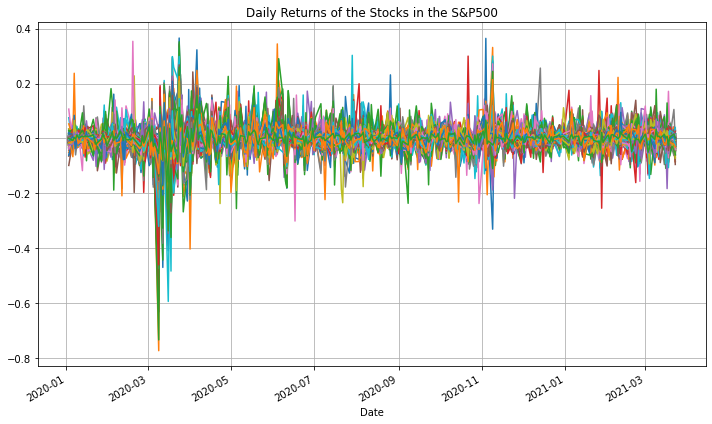

In [8]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

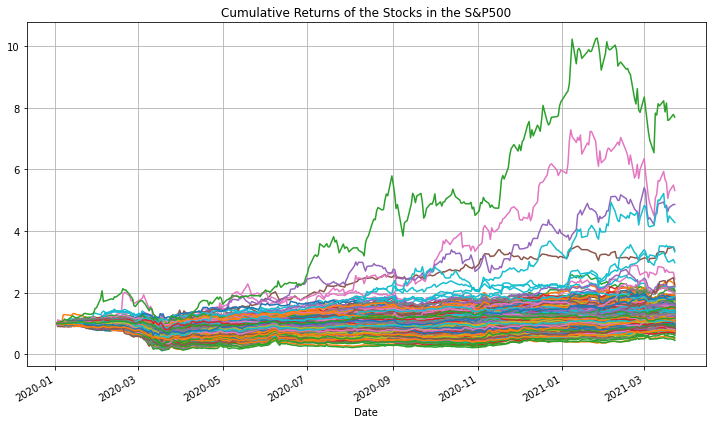

In [9]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.savefig('tmp.png')

The figures above show the daily returns and the cumulative returns of the 500 stocks in the S&P500 since the beginning of 2020. The amount of raw data can look quite overwhelming, so let’s process them via PCA by computing the 1st principal component of the daily returns. The figure below shows the values of the 1st principal component, which is essentially a vector of dimension 500 that contains a value for each of the 500 stocks.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(1).fit(rs.fillna(0))

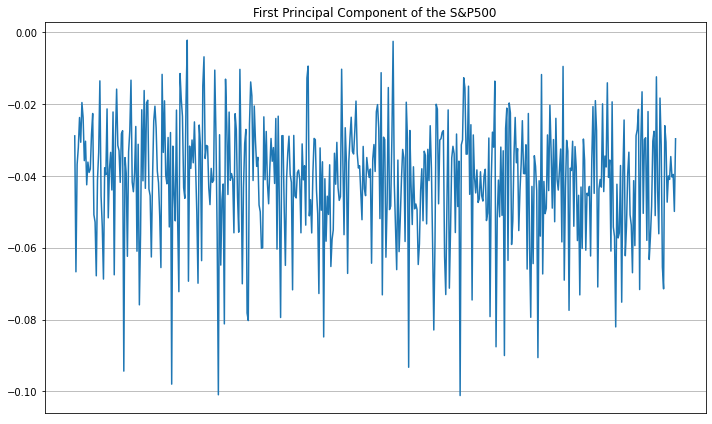

In [12]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

Recall that (1) the first principal component represents the linear combination of the input data that explains most of the variance, and (2) the primary driver of stock returns is the overall market factor. This implies that if we formulate a portfolio of stocks by allocating the cash proportionally to the 1st principal component (i.e. linear combination of the input data), we can replicate the returns of the S&P500 approximately (i.e. the primary driver of stock returns).

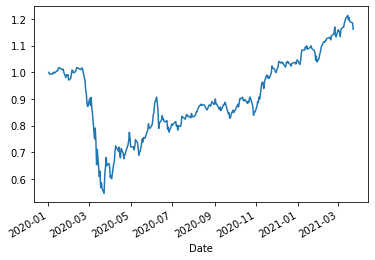

In [13]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [15]:
"""
The SPDR S&P 500 trust (SPY) is an exchange-traded fund which trades on the NYSE Arca under the symbol. 
SPDR is an acronym for the Standard & Poor's Depositary Receipts, the former name of the ETF. 
It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.
"""
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


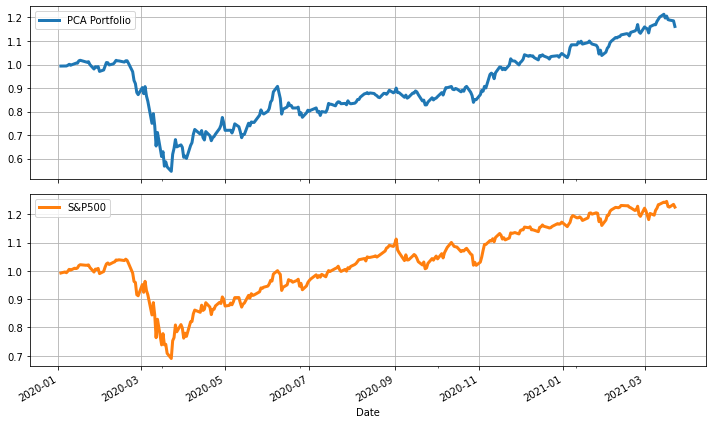

In [16]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()

As shown in the figure above, our PCA portfolio can work as a proxy for the market factor, which is the primary driver of stock returns (hence explaining most of the variance!). Note that although they are similar, the PCA portfolio doesn’t replicate the S&P500 exactly, since the S&P500 is a market-capitalisation weighted average of the 500 stocks, while the weights in the PCA portfolio is influenced by the explained variance.

### Analysing the Impact of COVID19 with PCA

Using PCA, we can cluster together businesses that were most/least affected by the COVID19 pandemic, without any prior knowledge of their fundamentals.

As you probably know, 2020 has been a wild ride for the stock market due to the COVID19 pandemic. Using PCA, we can analyse how this pandemic affected the individual stocks.

For instance, let’s look a the 1st principal component, and select the stocks that have the most and the least negative PCA weights, as shown below.

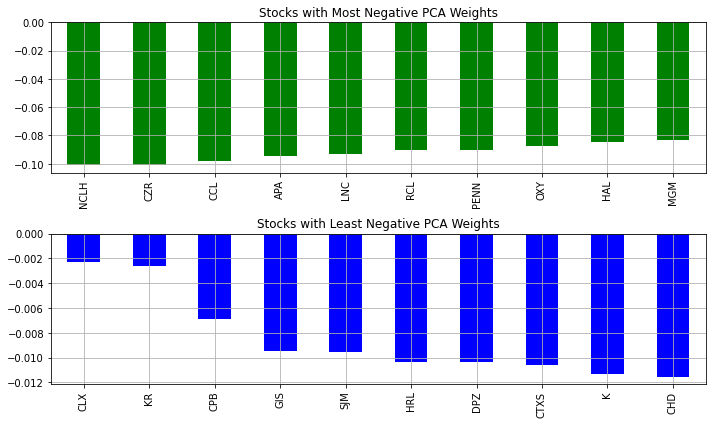

In [17]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()

Notice from the figure above how the most negative stocks are in the tourism and the energy sector. This makes sense since COVID19 heavily impacted the travelling business, as well as the energy companies that provide fuel for those businesses. On the other hand, the least impacted companies fall into the consumer goods sectors, which also makes sense since this sector benefited from the boost in sales of consumer goods due to the quarantine measures. 

In addition, we can formulate a winning portfolio that is long the top 10 companies according to the PCA weights. As shown in the figure below, the resulting portfolio would have performed significantly better than the market, since it invested in companies that actually benefited from the pandemic (this would have been great if one could go back in time and implement this strategy, as it has look-ahead bias).

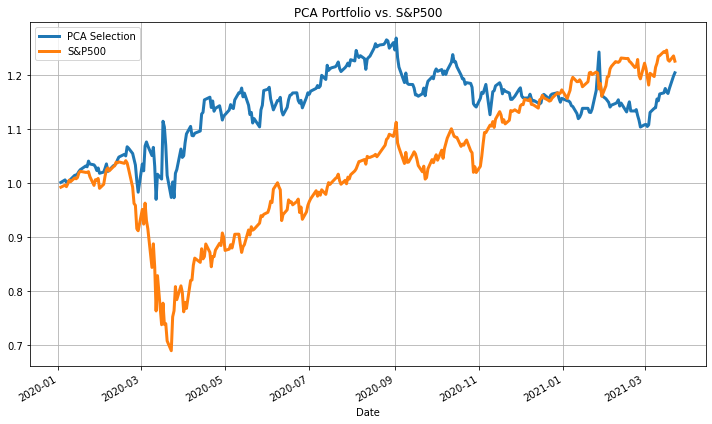

In [18]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

plt.tight_layout()